# Python в инженерных расчетах. Лекция 05.
<hr style="border:2px solid gray">

План занятия:

1. Загрузить и визуализировать график силы деформирования, полученный при испытаниях плоского образца на растяжение;
2. Пересчитать график силы деформирования в график инженерных и истинных напряжений и деформаций;
3. Определить предел прочности материала;
4. Определить равномерное удлинение материала;
5. Расчитать модуль Юнга для этой стали по данным эксперимента;
6. Определить условный предел текучести для этой стали;
7. Попробовать апроксимировать кривую сопративления пластической деформации простейшим урвнением.

#### Все расчёты будем производить с использованием библиотеки `NumPy`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
print('NumPy загружен. Версия:', np.__version__)

NumPy загружен. Версия: 2.3.3


In [2]:
# Размеры образца, которые нам понадобятся позднее
b0 = 20 # ширина образца по ISO 6892-1:2019
L0 = 80 # начальная длина образца по ISO 6892-1:2019
a0 = 1.5 # тольщина образца по исходным данным
A0 = b0*a0 # расчет площади поперечного сечения образца

#### 1. Создание массива NumPy. Первый столбец массива - перемещение, второй столбец - сила.

In [3]:
# Прочитаем данные из нашего файла load_stroke_data.txt
#load_stroke_array = np.loadtxt ('../data/load_stroke_data.txt', delimiter='\t')
load_stroke_array = np.loadtxt ('/home/alexander/Загрузки/3_20.txt', delimiter='\t')
print(load_stroke_array[:25])

[[0.0000e+00 0.0000e+00 1.0300e+02]
 [1.0000e-01 2.3500e-02 2.4700e+02]
 [2.0000e-01 8.2800e-02 6.7500e+02]
 [3.0000e-01 1.7590e-01 3.4630e+03]
 [4.0000e-01 2.1570e-01 5.3420e+03]
 [5.0000e-01 2.3550e-01 6.5600e+03]
 [6.0000e-01 2.9250e-01 1.0506e+04]
 [7.0000e-01 3.1240e-01 1.1979e+04]
 [8.0000e-01 3.3240e-01 1.3607e+04]
 [9.0000e-01 3.5300e-01 1.5362e+04]
 [1.0000e+00 4.1280e-01 2.0457e+04]
 [1.1000e+00 4.3290e-01 2.2235e+04]
 [1.2000e+00 4.5300e-01 2.3855e+04]
 [1.3000e+00 4.7320e-01 2.5467e+04]
 [1.4000e+00 4.9350e-01 2.6858e+04]
 [1.5000e+00 5.1450e-01 2.8126e+04]
 [1.6000e+00 5.3480e-01 2.9128e+04]
 [1.7000e+00 5.5520e-01 2.9842e+04]
 [1.8000e+00 5.7560e-01 3.0325e+04]
 [1.9000e+00 5.9590e-01 3.0800e+04]
 [2.0000e+00 6.5680e-01 3.1552e+04]
 [2.1000e+00 6.7780e-01 3.1819e+04]
 [2.2000e+00 6.9810e-01 3.2061e+04]
 [2.3000e+00 7.1860e-01 3.2278e+04]
 [2.4000e+00 7.3910e-01 3.2496e+04]]


#### Есть более сложный вариант, но на его примере давайте изучим создание массива NumPy из одного или нескольких списков. 

In [5]:
stroke = [] # пустой список для записи данных о перемещении
load = [] # пустой список для записи данных о силе

# открываем файл с данными
with open ('../data/load_stroke_data.txt', 'r') as file: # 'r' означает, что файл мы октрываем для чения
    for line in file:                                    # для каждой строки в файле мы выполняем следующие действия
        stroke_load = line.split('\t')                   # разделяем строку по табуляции (можно было ничего не писать в скобках 
                                                         # и разделение было бы по любым пробелам). Получаем временный список из двух чисел
        stroke.append(float(stroke_load[0]))             # первое число добавляем в список stroke
        load.append(float(stroke_load[1]))               # второе число в список load
# Два полученных списка мы объединяем в NumPy array
load_stroke_array = np.array([stroke, load]).T  # .T — транспонируем: строки → столбцы (иначе будет две длинные строки)
print(load_stroke_array[:25])

[[0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.42146880e+02]
 [0.00000000e+00 1.43395231e+02]
 [0.00000000e+00 1.45049487e+02]
 [0.00000000e+00 1.46037445e+02]
 [0.00000000e+00 1.47101990e+02]
 [3.03244289e-04 1.48258437e+02]
 [0.00000000e+00 1.49407226e+02]
 [3.03244289e-04 1.50594308e+02]
 [3.03795066e-04 1.51781390e+02]
 [3.03797483e-04 1.52937837e+02]
 [3.03797483e-04 1.54124919e+02]
 [3.03797483e-04 1.55250733e+02]
 [3.03797483e-04 1.56376546e+02]
 [3.03797483e-04 1.58344804e+02]
 [3.03797483e-04 1.59340421e+02]
 [3.03797483e-04 1.61193801e+02]
 [3.03797483e-04 1.63131425e+02]
 [3.03797483e-04 1.64904389e+02]
 [3.03797483e-04 1.66899452e+02]
 [6.07041772e-04 1.67918045e+02]
 [3.03797483e-04 1.68967272e+02]
 [6.07041772e-04 1.70085427e+02]
 [6.07592549e-04 1.71249533e+02]
 [6.07594966e-04 1.72375346e+02]]


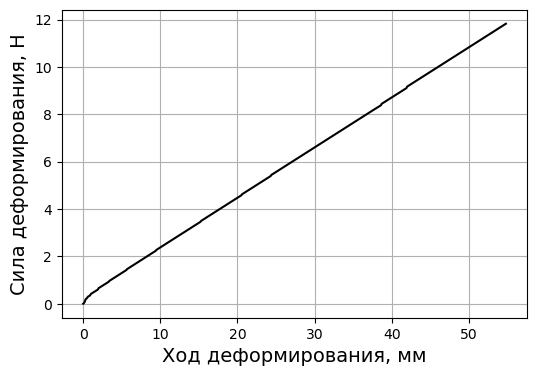

In [6]:
# Визуализируем результаты
# создаем "базу" для графика
plt.figure(figsize=(6, 4))
plt.plot (load_stroke_array[:,0], load_stroke_array[:,1], '-', color = 'black')
# Добавляем названия осей
plt.xlabel ('Ход деформирования, мм', fontsize = 14)
plt.ylabel ('Сила деформирования, Н', fontsize = 14)
# добавляем для красоты сетку
plt.grid()

## 2. Векторизованные операции (определение напряжений и деформаций)

NumPy позволяет выполнять операции над всем массивом **без циклов**.

In [7]:
# Пример: расчитаем инженерные и истинные деформации/напряжения:
# сначала создадим нулевой массив равный по размеру массиву с силой и перемещением
stress_strain_eng = np.zeros(load_stroke_array.shape)
# в нулевой столбец запишем инженерную деформацию (формулу смотрите в лекции 002)
stress_strain_eng[:,0] = (load_stroke_array[:,0]/L0)*100
# в первый столбец запишем инженерное напряжение (формулу смотрите в лекции 002)
stress_strain_eng[:,1] = load_stroke_array[:,1]/A0
# аналогично с истинными напряжениями и деформациями
stress_strain_true = np.zeros(load_stroke_array.shape)
stress_strain_true[:,1] = stress_strain_eng[:,1]*(1 + stress_strain_eng[:,0]/100)
stress_strain_true[:,0] = np.log(1 + stress_strain_eng[:,0]/100)

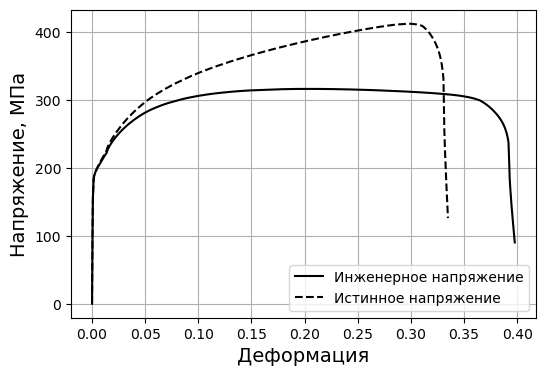

In [8]:
# Визуализируем результаты
# создаем "базу" для графика
plt.figure(figsize=(6, 4))
plt.plot (stress_strain_eng[:,0]/100, stress_strain_eng[:,1], '-', color = 'black', label = 'Инженерное напряжение')
plt.plot (stress_strain_true[:,0], stress_strain_true[:,1], '--', color = 'black', label = 'Истинное напряжение')
# Добавляем названия осей
plt.xlabel ('Деформация', fontsize = 14)
plt.ylabel ('Напряжение, МПа', fontsize = 14)
# добавляем для красоты сетку
plt.grid()
plt.legend()

## 3. Определение предела прочности Rm и равномерного удлинения Ag

In [9]:
# Поиск предела прочности
Rm = stress_strain_eng [:, 1].max()
print (f'Предел прочности материала Rm = {Rm:.3f} МПа')

Предел прочности материала Rm = 316.736 МПа


In [10]:
# Определение равномерного удлинения
# для начала определим индекс соответсвующий пределу прочности
ind = np.argmax( stress_strain_eng [:, 1])
Ag = stress_strain_eng [ind, 0] - (Rm/210000)*100
print(f'Равномерное удлинение Ag = {Ag:.3f}, %')

Равномерное удлинение Ag = 20.434, %


## 4. Определение модуля Юнга

In [11]:
# Гарантироанная упругая зона находится из условия: ε < 0.05% → 0.0005
elastic_mask = stress_strain_true [:, 0] <= 0.0005 # elastic_mask - список в котором ячейка = True если ε < 0.5% 
print (elastic_mask)

[ True  True  True ... False False False]


In [12]:
strain_elastic = stress_strain_true[:,0][elastic_mask]
stress_elastic = stress_strain_true[:,1][elastic_mask]
# Расчёт модуля Юнга
numerator = np.sum(stress_elastic * strain_elastic)
denominator = np.sum(strain_elastic ** 2)
Youngs_modulus = numerator / denominator

print(f'Модуль Юнга E = {Youngs_modulus:.0f} МПа')

Модуль Юнга E = 221900 МПа


## 5. Определение условного предела текучести и построение графика сопротивления пластической деформации

In [13]:
# отбросим упругую часть графика
filtr_01 = stress_strain_true [:, 0] - stress_strain_true [:, 1]/Youngs_modulus >= 0.002 
# отбрасываем часть графика, соответсвующую зоне локализации деформации
ind = np.argmax (stress_strain_true [:, 1])
filtr_02 = np.arange(len(stress_strain_true [:, 1])) <= ind
flow_stress_curve = np.array(stress_strain_true[filtr_01 & filtr_02])
# и передвиним график в начало координать по оси деформации
flow_stress_curve[:, 0] = flow_stress_curve[:, 0] - flow_stress_curve[0, 0]
# Предел текучести таким образом:
yield_stress = flow_stress_curve[0, 1]
print (f'Условный предел текучести материала Sigma02 = {yield_stress:.2f}, МПа')

Условный предел текучести материала Sigma02 = 193.46, МПа


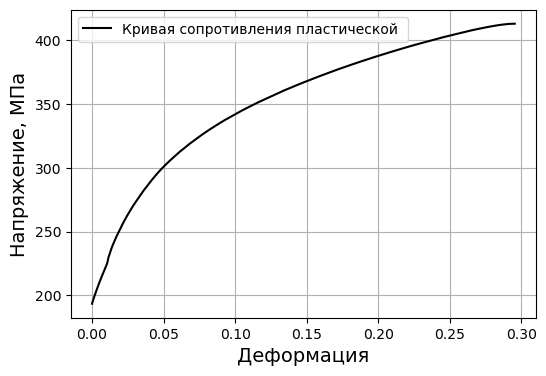

In [14]:
# Визуализируем результаты
# создаем "базу" для графика
plt.figure(figsize=(6, 4))
plt.plot (flow_stress_curve[:,0], flow_stress_curve[:,1], '-', color = 'black', label = 'Кривая сопротивления пластической ')
# Добавляем названия осей
plt.xlabel ('Деформация', fontsize = 14)
plt.ylabel ('Напряжение, МПа', fontsize = 14)
# добавляем для красоты сетку
plt.grid()
plt.legend()

## 5. Аппроксимация кривой сопротивления пластической деформации

В пластической области часто используется обобщённая степенная модель:

$$
\sigma_{\text{true}} = \sigma_0 + K \cdot \varepsilon_{\text{true}}^n
$$

где:
- $\sigma_0$ — напряжение течения при начале пластического деформирования (близок к пределу текучести)
- $K$ — коэффициент прочности, МПа
- $n$ — показатель упрочнения

Если значение $\sigma_0$ **известно или задано (в шашем случае пусть это будет условный предел)**, можно прологарифмировать остаток:

$$
\ln(\sigma_{\text{true}} - \sigma_0) = \ln K + n \cdot \ln \varepsilon_{\text{true}}
$$

Тогда задача сводится к линейной регрессии между $\ln \varepsilon_{\text{true}}$ и $\ln(\sigma_{\text{true}} - \sigma_0)$.

In [15]:
# Линейная регрессия: y = a + n*x, где a = ln(K), n = показатель упрочнения
# Логорифмируем левую часть
log_sigma = np.log(flow_stress_curve[1:,1] - yield_stress)
log_epsilon = np.log(flow_stress_curve[1:,0])

# Линейная регрессия: y = a + n*x, где a = ln(K), n = показатель упрочнения
coeffs = np.polyfit(log_epsilon, log_sigma, deg = 1)
n = coeffs[0]        # показатель упрочнения
K = np.exp(coeffs[1])  # K = exp(a)

print(f'Показатель упрочнения (n): {n:.3f}')
print(f'Коэффициент прочности (K): {K:.1f} МПа')

Показатель упрочнения (n): 0.698
Коэффициент прочности (K): 709.6 МПа


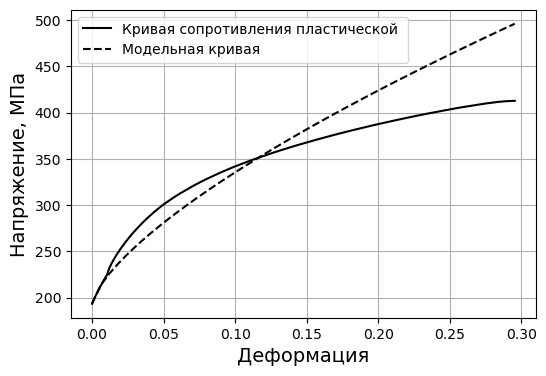

In [16]:
# сравним кривую сопротивления пластической деформации модельную и исходную
strain = np.linspace(0, flow_stress_curve[-1,0])
stress = yield_stress + K*strain**n
# Визуализируем результаты
# создаем "базу" для графика
plt.figure(figsize=(6, 4))
plt.plot (flow_stress_curve[:,0], flow_stress_curve[:,1], '-', color = 'black', label = 'Кривая сопротивления пластической ')
plt.plot (strain, stress, '--', color = 'black', label = 'Модельная кривая')
# Добавляем названия осей
plt.xlabel ('Деформация', fontsize = 14)
plt.ylabel ('Напряжение, МПа', fontsize = 14)
# добавляем для красоты сетку
plt.grid()
plt.legend()

## Заключение: методы NumPy, использованные в лекции

В ходе лекции были применены следующие функции и методы библиотеки **NumPy**:

1. **`np.loadtxt()`** — загрузка данных из текстового файла (с разделителями) в массив NumPy.  
2. **`np.array()`** — создание массива из Python-списков.  
3. **`.T`** — транспонирование массива (замена строк и столбцов).  
4. **`np.zeros()`** — создание массива, заполненного нулями, заданной формы.  
5. **Векторизованные арифметические операции** — выполнение математических операций над целыми массивами без циклов (например, деление, умножение, логарифмирование).  
6. **`np.argmax()`** — поиск индекса максимального элемента в массиве (использовался для определения предела прочности).  
7. **`np.max()`** — нахождение максимального значения в массиве (применялось для вычисления предела прочности `Rm`).  
8. **`np.sum()`** — суммирование элементов массива (применялось при расчёте модуля Юнга методом наименьших квадратов).  
9. **`np.polyfit()`** — полиномиальная аппроксимация данных (в лекции — линейная регрессия в логарифмических координатах).  
10. **`np.log()`** — вычисление натурального логарифма (для линеаризации степенной модели упрочнения).  
11. **`np.exp()`** — вычисление экспоненты (для восстановления коэффициента прочности после логарифмирования).  
12. **`np.linspace()`** — генерация равномерно распределённых значений в заданном интервале (использовалась для построения модельной кривой упрочнения).  
13. **Булевы маски и логическая индексация** — отбор подмножеств массива по условию (например, выделение упругой зоны или участка до шейки).  